In [1]:
from PIL import Image
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
file_path="01_HR_Attrition_Cleaned.csv"
if not os.path.exists(file_path):
    raise FileNotFoundError(f"The file{file_path} was not there.")
print(os.getcwd())


D:\Jupyter Notebook\HR_Analytics_Project


In [3]:
df=pd.read_csv(file_path)
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,...,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Years_At_Company,YearsInCurrentRole,Years_Since_Promotion,YearsWithCurrManager,Attrition_Flag
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,...,3,1,8,0,1,6,4,0,5,1
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,...,4,4,10,3,3,10,7,1,7,0
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,...,3,2,7,3,3,0,0,0,0,1
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,...,3,3,8,3,3,8,7,3,0,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,...,3,4,6,3,3,2,2,2,2,0


In [4]:
print("\n Dataset info:")
print(df.info())


 Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   JobInvolvement            1470 non-null   int64 
 10  JobLevel                  1470 non-null   int64 
 11  JobRole                   1470 non-null   object
 12  JobSatisfaction           1470 non-null   int64 
 13  MaritalStatus             1470 non-null   object
 14  Salary  

In [5]:
print("\n Dataset Shape:",df.shape)
print("\n Missing Values:")
print(df.isnull().sum())


 Dataset Shape: (1470, 26)

 Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
Salary                      0
OverTime                    0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
Years_At_Company            0
YearsInCurrentRole          0
Years_Since_Promotion       0
YearsWithCurrManager        0
Attrition_Flag              0
dtype: int64


In [6]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
Salary                       int64
OverTime                    object
PerformanceRating            int64
RelationshipSatisfaction     int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
Years_At_Company             int64
YearsInCurrentRole           int64
Years_Since_Promotion        int64
YearsWithCurrManager         int64
Attrition_Flag               int64
dtype: object

In [7]:
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [8]:
df["Attrition"]=df['Attrition'].str.strip().fillna("No")
df["Attrition_Flag"]=df["Attrition"].map({"Yes":1,"No":0})
df["Attrition_Flag"].value_counts()

Attrition_Flag
0    1233
1     237
Name: count, dtype: int64

In [9]:
for col in ['Department','JobRole','BusinessTravel','MaritalStatus','OverTime']:
    print(f":\nUnique values in {col}:")
    print(df[col].unique())

:
Unique values in Department:
['Sales' 'Research & Development' 'Human Resources']
:
Unique values in JobRole:
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
:
Unique values in BusinessTravel:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
:
Unique values in MaritalStatus:
['Single' 'Married' 'Divorced']
:
Unique values in OverTime:
['Yes' 'No']


In [10]:
print("\n Summary Statistics:")
df.describe()


 Summary Statistics:


,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,Salary,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,Years_At_Company,YearsInCurrentRole,Years_Since_Promotion,YearsWithCurrManager,Attrition_Flag
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,3.153741,2.712245,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129,0.161224
std,9.135373,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,0.360824,1.081209,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136,0.367863
min,18.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,3.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,3.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,3.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,43.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,3.000000,4.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000,0.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,4.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,1.000000


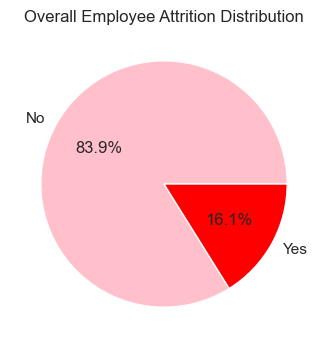

In [11]:
#Attrition OverView
plt.figure(figsize=(6,4))
df['Attrition'].value_counts().plot.pie(autopct='%1.1f%%',colors=['pink','red'])
plt.title("Overall Employee Attrition Distribution")
plt.ylabel("")
plt.show()

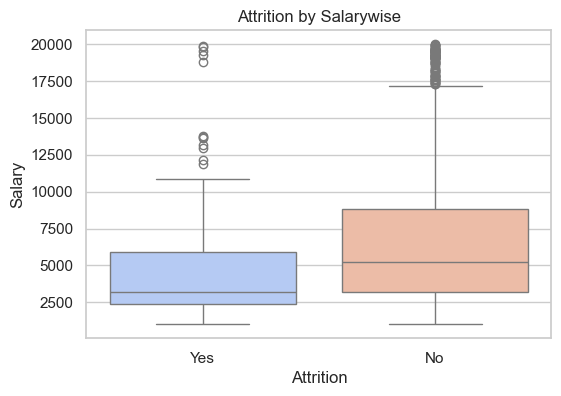

In [12]:
#Salary vs Attrition
plt.figure(figsize=(6,4))
sns.boxplot(x='Attrition',y='Salary',data=df,palette='coolwarm')
plt.title("Attrition by Salarywise")
plt.show()

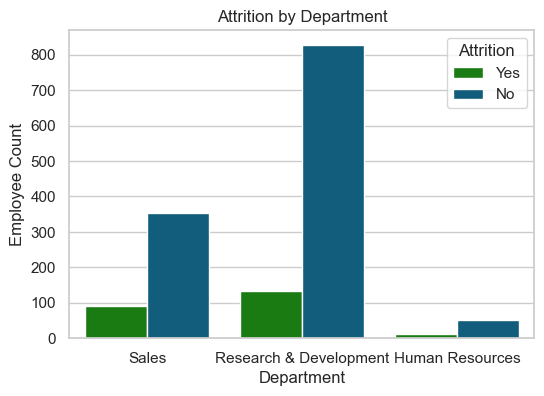

In [13]:
#Attrition by Department
plt.figure(figsize=(6,4))
custom_colors=["#0A8C00", "#00648C"]
sns.countplot(data=df,x="Department",hue="Attrition",palette=custom_colors)
plt.title("Attrition by Department")
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.xticks(rotation=0)
plt.show()

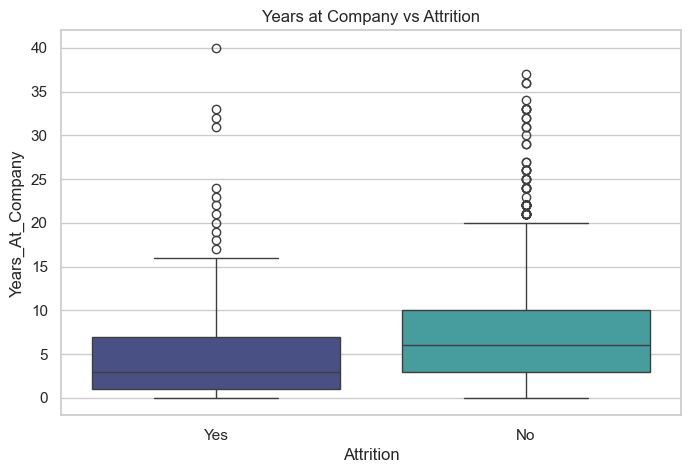

In [14]:
#Years at Company vs Attrition 
plt.figure(figsize=(8,5))
sns.boxplot(x='Attrition',y='Years_At_Company',data=df,palette='mako')
plt.title("Years at Company vs Attrition")
plt.show()

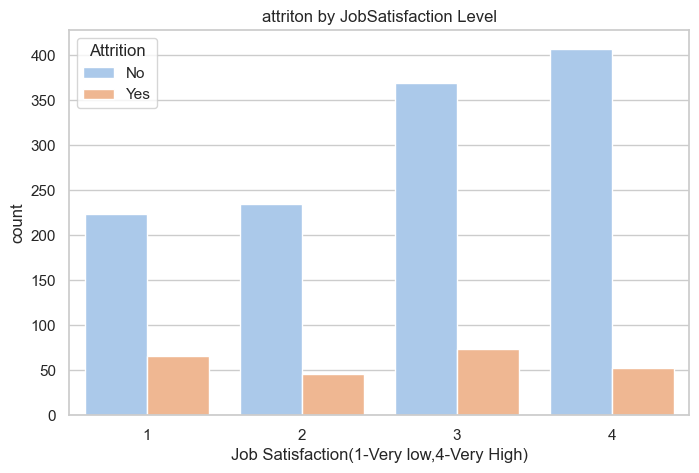

In [15]:
#Job Satisfaction vs Attrition
plt.figure(figsize=(8,5))
sns.countplot(x="JobSatisfaction",hue="Attrition",data=df,palette="pastel")
plt.title("attriton by JobSatisfaction Level")
plt.xlabel("Job Satisfaction(1-Very low,4-Very High)")
plt.show()

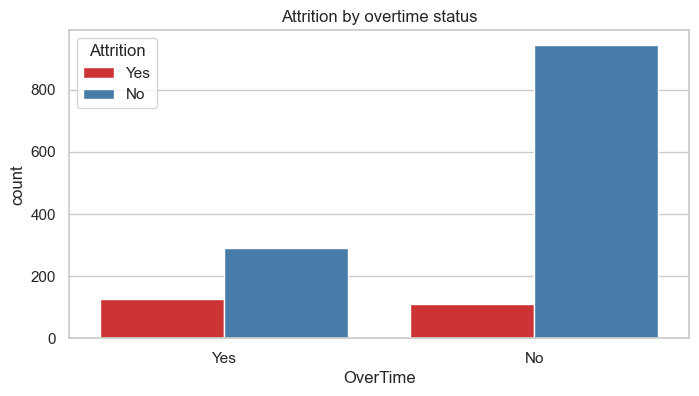

In [16]:
# Overtime Vs Attrition 
plt.figure(figsize=(8,4))
sns.countplot(x='OverTime',hue='Attrition',data=df,palette='Set1')
plt.title("Attrition by overtime status")
plt.show()

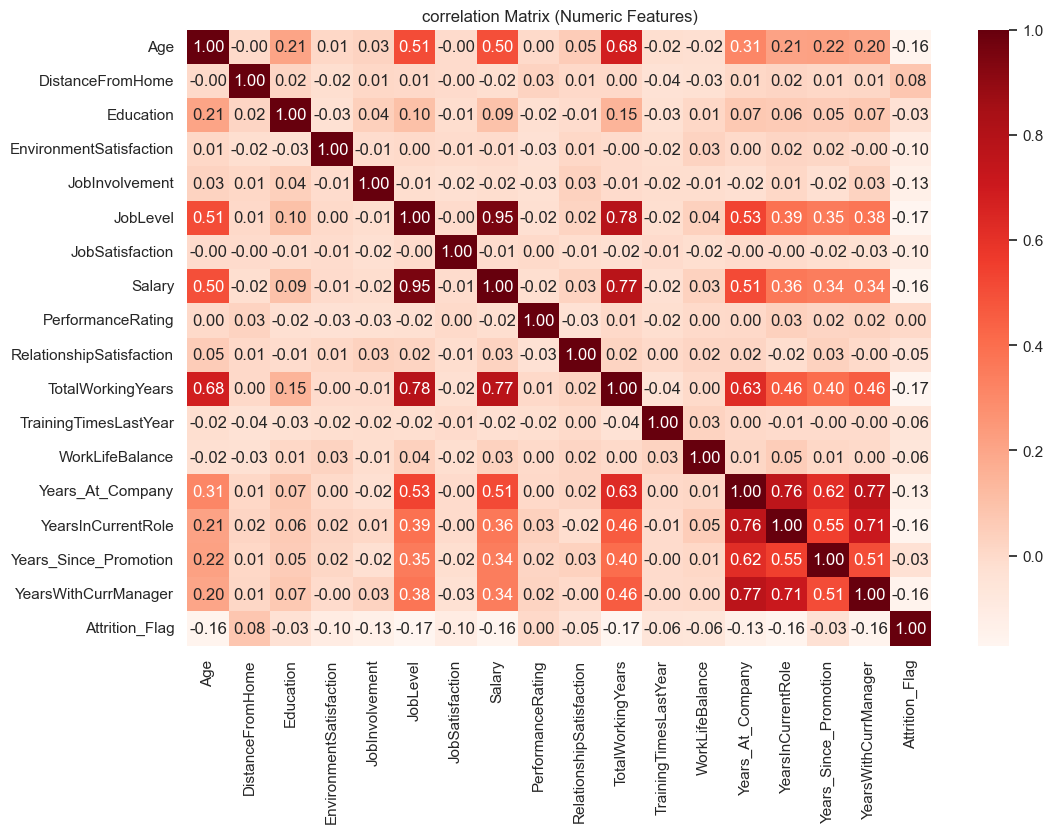

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='Reds',fmt=".2f")
plt.title("correlation Matrix (Numeric Features)")
plt.show()

In [18]:
print("\n Key Insights (from Visual Analysis):")
print("1 Department like sales and R&D show higher attrition Compared to HR.")
print("2 Employees with lower salary ranges have higher attrition.")
print("3 Employees with <=2 years at company tend to leave more frequently.")
print("4 Low job satisfaction(1 or2) strongly correlates with attrition.")
print("5 Overtime workers leave significantly more often than non-overtime emplooyees.")
print("6 Correlation shos salary,yearsatcompany and jobsstisfaction negatively correlated woth Attrition.")


 Key Insights (from Visual Analysis):
1 Department like sales and R&D show higher attrition Compared to HR.
2 Employees with lower salary ranges have higher attrition.
3 Employees with <=2 years at company tend to leave more frequently.
4 Low job satisfaction(1 or2) strongly correlates with attrition.
5 Overtime workers leave significantly more often than non-overtime emplooyees.
6 Correlation shos salary,yearsatcompany and jobsstisfaction negatively correlated woth Attrition.


In [19]:
df.to_csv("01_HR_Attrition_Cleaned.csv",index=False)
print("\n File saved as 01_HR_Attrition_Cleaned.csv")


 File saved as 01_HR_Attrition_Cleaned.csv
